In [1]:
from __future__ import print_function

In [2]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO
import os

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
#Read in the train data 
DATA_DIR = os.path.join("..","lol_project", "data")
DATA_DIR = os.path.abspath(DATA_DIR)

In [4]:
house_data  = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))


house_data_features = house_data.columns.get_values()
house_data_features = house_data_features.tolist()
print (house_data_features)


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
house_data.shape

(1460, 81)

In [6]:
print (house_data_features)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [ ]:
#house_data_columns = house_data_features[:3] + house_data_features[4:5] + house_data_features[17:21]+house_data_features[34:35]
#+house_data_features[36:39]+
#house_data_columns
# started sorting the data by data type then found sort_values which did it automatically 



In [7]:
house_data_columns = house_data.dtypes.sort_values()


In [8]:
house_data.dtypes[40:]

HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object


In [57]:
cols = list(house_data.columns.values)
house_data.SalePrice.mean()

180921.19589041095

In [10]:
house_data = house_data[['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']]

In [11]:
house_data_columns = ['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
house_data.dtypes[:40]

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
LotFrontage      float64
MasVnrArea       float64
GarageYrBlt      float64
MSZoning          object
Street            object


In [13]:
# Replace all the missing categorical data with "missing" creating an additional factor for the model. 
house_data_category_missing = house_data[house_data_columns[38:]].fillna("missing")
house_data_category_missing.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1,RL,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
4,RL,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal


In [14]:
house_data_category_filled = house_data_category_missing[house_data_columns[38:]]

In [15]:
# use get_dummies to convert a categorical feature the models can understand 
house_data_dummies = pd.get_dummies(house_data_category_filled,drop_first=True).astype(int)
house_data_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_missing,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#house_data= house_data.LotFrontage.astype(int)


In [16]:
house_data.MasVnrArea.mean()

103.68526170798899

In [17]:
# replace missing float values with the mean of the rest of the data. 
mean_per_column = house_data[house_data_columns[35:38]].apply(
    lambda x: x.mean(), axis=0)
mean_per_column = mean_per_column.round(decimals=0)

house_data_float_missing = house_data[house_data_columns[35:38]].fillna(mean_per_column,axis=0)
house_data_float_missing.head()


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


A quick look at the data shows that I am going to have to do some feature engineering. It is clear that there are a lot of NaN values as well as features that contain objects that will have to be converted to integers. 

In [18]:
# checking for nulls in data set 

house_data.isnull().sum()[0:40]


Id                 0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
LotFrontage      259
MasVnrArea         8
GarageYrBlt       81
MSZoning           0
Street             0
dtype: int64

In [19]:
house_data.shape

(1460, 81)

In [20]:
house_data_nonull = house_data[house_data_columns[:35]]
house_data_nonull.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
# Create a new DF by concat the feature engineered df with the non fetaure engineered df
house_data_feature_engineered = pd.concat([house_data_nonull,house_data_float_missing,house_data_dummies],axis=1)

In [22]:
# a feature engineereed data set ready to run some modeling on 
house_data_feature_engineered.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


Below I am going to do some practice with decision tree's. This will most likely not be my final project. I would ultimatly like to use a random forest model to predict the sale price of a home. 

In [23]:
# rearrange the data frame so sale price is on the end
house_data_feature_engineered = house_data_feature_engineered[['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Alley_missing',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'MasVnrType_missing',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtQual_missing',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtCond_missing',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_missing',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType1_missing',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFinType2_missing',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'Electrical_missing',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'FireplaceQu_missing',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_missing',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageFinish_missing',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageQual_missing',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'GarageCond_missing',
 'PavedDrive_P',
 'PavedDrive_Y',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'PoolQC_missing',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'Fence_missing',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'MiscFeature_TenC',
 'MiscFeature_missing',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial','SalePrice']]
house_data_feature_engineered.shape

(1460, 263)

In [24]:
#create a list of features that will be used in the model. 
house_data_engineered_col = house_data_feature_engineered.columns.get_values()
house_data_engineered_col = house_data_engineered_col.tolist()
house_data_engineered_col

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Alley_missing',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr'

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
house_data_engineered_col = house_data_engineered_col[1:262]

In [27]:
X,y = StandardScaler().fit_transform(house_data_feature_engineered[house_data_engineered_col]), house_data_feature_engineered.SalePrice

In [28]:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=1234)


In [29]:
X_train

array([[-0.16310947, -0.45268568, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.49228154, -0.2630656 , -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.15973669, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ..., 
       [-0.87256276,  0.42736397,  1.3747946 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.16310947, -0.23500343, -1.51846683, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.16237692,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [30]:

decision_tree = DecisionTreeRegressor(max_depth = 17)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",
      np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_test))))

Decision Tree RMSE: 37034.0004494


Decision Tree Train/Test RMSE: 60841.6767586   55554.7315412
Decision Tree Train/Test RMSE: 49743.3434138   47986.0282629
Decision Tree Train/Test RMSE: 41964.4114866   41900.8200592
Decision Tree Train/Test RMSE: 35271.332574   39739.4240193
Decision Tree Train/Test RMSE: 28687.277221   36646.7975035
Decision Tree Train/Test RMSE: 22790.550023   38903.4301959
Decision Tree Train/Test RMSE: 17991.3307533   37838.4966969
Decision Tree Train/Test RMSE: 13317.4047664   37887.2096408
Decision Tree Train/Test RMSE: 9202.90976896   36745.1869603
Decision Tree Train/Test RMSE: 6060.66810448   40171.0768105
Decision Tree Train/Test RMSE: 3970.7261227   37220.6538889
Decision Tree Train/Test RMSE: 2514.40408963   39727.1371226
Decision Tree Train/Test RMSE: 1801.315108   38418.787461
Decision Tree Train/Test RMSE: 1292.71737302   38654.5841444
Decision Tree Train/Test RMSE: 911.708939129   38442.8073352
Decision Tree Train/Test RMSE: 642.040166145   41725.0181054
Decision Tree Train/Test RMSE: 

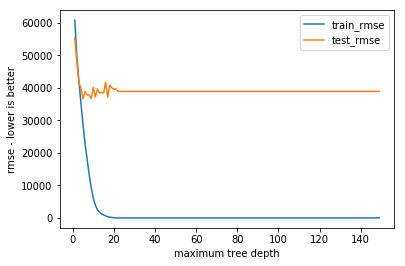

In [31]:
depths = range(1, 150)
train_rmse, test_rmse = [], []
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth, random_state=10)
    decision_tree.fit(X_train, y_train)
    curr_train_rmse = np.sqrt(
        mean_squared_error(y_train, decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(
        mean_squared_error(y_test, decision_tree.predict(X_test)))
    
    print("Decision Tree Train/Test RMSE:", curr_train_rmse, " ",
          curr_test_rmse)
    
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths, train_rmse, label='train_rmse')
sns.mpl.pyplot.plot(depths, test_rmse, label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()

In [32]:
pd.DataFrame({'feature':house_data_engineered_col, 'importance':decision_tree.feature_importances_}).sort_values(
    by='importance', ascending=False)

,feature,importance
2,OverallQual,0.630064
11,2ndFlrSF,0.087075
13,GrLivArea,0.064835
10,1stFlrSF,0.032303
9,TotalBsmtSF,0.030632
4,YearBuilt,0.020372
24,WoodDeckSF,0.019241
1,LotArea,0.010995
33,LotFrontage,0.009086
20,TotRmsAbvGrd,0.008973


Ok. So what we can see from creating a simple decision tree is that this will not be a good model to use for this use case. The RMSE is incredibly high, and the importance of each feature is incredibly low in some case down to the -9th. So let's try and do a random forest model. 

In [33]:
#component matrix to reduce the number of features. 
pca = PCA()
transformed_pca_x = pca.fit_transform(house_data_feature_engineered[house_data_engineered_col])
#create component indices
component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]

#generate new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
transformed_pca_x.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_252,component_253,component_254,component_255,component_256,component_257,component_258,component_259,component_260,component_261
0,-2065.542149,18.448740,-285.141934,736.136237,-165.922039,-187.716026,-63.110186,47.743218,13.700828,-108.720449,...,-0.000636,-0.000291,5.692360e-12,6.176297e-13,-7.027454e-13,6.265488e-13,-7.985560e-13,1.844322e-12,1.657878e-13,-3.832726e-13
1,-912.040763,-10.386091,743.661608,225.380718,-46.595761,-78.034754,58.025901,-46.587614,-99.935267,203.614248,...,0.000069,0.000754,-5.970177e-12,5.921669e-13,1.569951e-13,-5.242461e-13,1.767583e-12,1.454757e-12,-6.173486e-13,-2.689614e-13
2,734.161352,86.821682,-472.285560,412.636535,-125.976290,-176.257654,-83.683267,63.004917,-36.453598,-110.548023,...,-0.000707,-0.001106,9.748959e-12,-6.286775e-13,7.404654e-13,2.328284e-14,-1.534094e-12,-1.621781e-12,-2.548359e-12,3.063233e-13
3,-970.840438,-54.407066,-581.459741,180.595291,-96.091534,9.252540,-110.960061,15.879828,-179.164851,-115.510094,...,-0.003459,0.000632,1.100632e-14,-1.988403e-13,3.613734e-13,-1.400609e-12,-9.151781e-14,-1.152133e-12,7.932622e-13,-1.472179e-13
4,3757.977062,638.415097,-537.932756,539.836793,-135.988303,-186.261018,-244.476185,137.269350,7.099605,30.574584,...,-0.000674,-0.000909,-1.382887e-12,2.440798e-13,1.311007e-12,6.359977e-13,2.065406e-12,1.222654e-12,-2.037075e-13,-1.363525e-14


Text(0,0.5,u'eigenvalue')

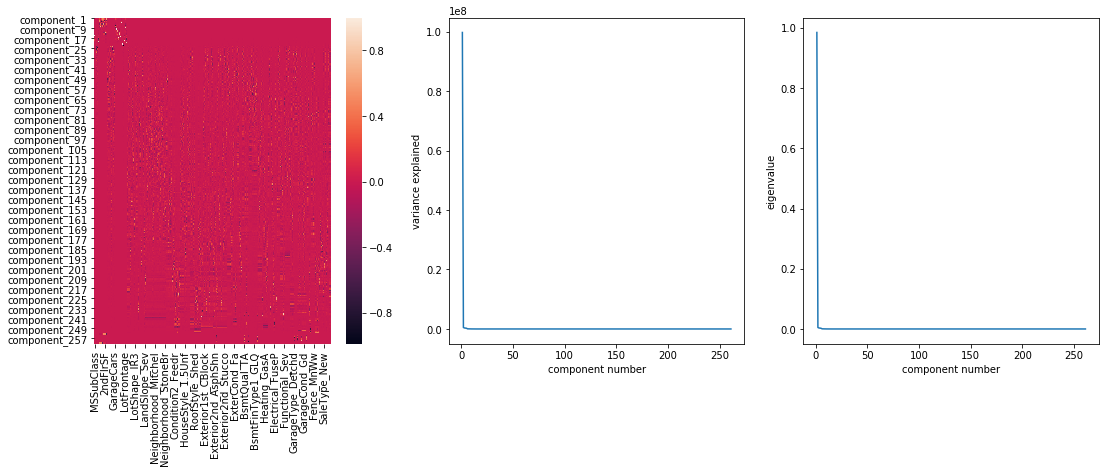

In [34]:
#generate component loadings on original features
component_matrix = pd.DataFrame(pca.components_,index=component_names,columns = house_data_engineered_col)
#add additional columns to describe what
component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
component_matrix["eigenvalue"] = pca.explained_variance_
figure = sns.mpl.pyplot.figure(figsize=(18,6))
#add 3 subplots one at a time

#first the component matrix
figure.add_subplot(131)
sns.heatmap(component_matrix.iloc[:,:-2])

#then the eigenvalues
figure.add_subplot(132)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.eigenvalue)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("variance explained")

#then the explained variance ratio
figure.add_subplot(133)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.explained_variance_ratio)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("eigenvalue")

In [35]:
component_matrix.explained_variance_ratio.cumsum()

component_1      0.984793
component_2      0.989743
component_3      0.993133
component_4      0.995909
component_5      0.998324
component_6      0.998826
component_7      0.999149
component_8      0.999448
component_9      0.999674
component_10     0.999813
component_11     0.999854
component_12     0.999888
component_13     0.999918
component_14     0.999947
component_15     0.999962
component_16     0.999977
component_17     0.999986
component_18     0.999993
component_19     0.999996
component_20     0.999998
component_21     1.000000
component_22     1.000000
component_23     1.000000
component_24     1.000000
component_25     1.000000
component_26     1.000000
component_27     1.000000
component_28     1.000000
component_29     1.000000
component_30     1.000000
                   ...   
component_232    1.000000
component_233    1.000000
component_234    1.000000
component_235    1.000000
component_236    1.000000
component_237    1.000000
component_238    1.000000
component_23

In [ ]:
#house_data_feature_engineered.corr()

In [50]:
X_sale = house_data_feature_engineered[house_data_engineered_col]
y_sale = house_data_feature_engineered.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X_sale, y_sale, test_size=0.4)

#scaler 
scaler = StandardScaler()
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#pca fit
pca = PCA()

pca.fit(X_train_scaled)

#pca transform 
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#RF regressor model
rf_sale = RandomForestRegressor(n_estimators=500, bootstrap=True,oob_score=True, random_state=1234)
rf_sale.fit(X_train_pca, y_train)
y_pred_rf_sale = rf_sale.predict(X_test_pca)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_sale)))

Random Forest RMSE: 30162.1020845


In [59]:
predictions = rf_sale.predict(X_test_pca)
predictions

array([ 349888.582,  199882.534,  231118.382,  145610.388,  124439.31 ,
        132440.538,  185787.364,  137213.284,  150137.534,  151905.928,
        128854.454,  135736.958,  321943.608,  217008.43 ,  184260.5  ,
        225856.894,  125951.334,  118950.742,  194523.938,  188557.328,
        153392.188,  135682.882,  272568.384,  234529.628,   95854.34 ,
        143058.534,  183868.114,  191719.654,  423957.726,  218344.244,
        136318.662,  292756.87 ,  219313.138,  230195.798,  134116.228,
        218119.688,  194681.422,   94936.074,  265341.18 ,  174655.702,
        157013.218,  128586.624,  197586.996,  162687.264,  123055.264,
        118629.818,  234087.826,  141088.348,  126910.396,  228389.434,
         91938.176,  120129.652,  390232.64 ,  318043.676,  221514.126,
        425609.386,  148012.764,  195390.232,  131557.366,  118443.528,
        374618.992,  159334.46 ,  140789.954,  162509.002,  141138.748,
        340194.382,  122645.428,  128567.468,  132126.356,  1327

In [ ]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf_sale.predict(X_train_pca)
predicted_test = rf_sale.predict(X_test_pca)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print (test_score)
print (spearman)
#print (pearson)

In [ ]:
# list of values to try for n_estimators
estimator_range = range(200,800,20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(
        n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    
    rfreg.fit(X_train_pca, y_train)
    preds = rfreg.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    RMSE_scores.append(rmse)

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(estimator_range, RMSE_scores)
sns.mpl.pyplot.xlabel('n_estimators')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [ ]:
# list of values to try for max_features
feature_range = range(1, len(house_data_engineered_col)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train_pca,y_train)
    preds = rfreg.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

In [52]:
preds

NameError: name 'preds' is not defined

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [46]:
# compute feature importances
test = pd.DataFrame({
    'feature': house_data_engineered_col,
    'importance': rf_sale.feature_importances_
}).sort_values(
    by='importance', ascending=False)

test.feature.tolist()

['MSSubClass',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'LandContour_HLS',
 'Condition1_Feedr',
 'LotArea',
 'Exterior2nd_Stucco',
 'Exterior1st_AsphShn',
 'EnclosedPorch',
 'GrLivArea',
 'GarageCars',
 'Functional_Typ',
 'BsmtQual_Gd',
 'MasVnrArea',
 'Condition1_PosA',
 'RoofMatl_Tar&Grv',
 'Fence_MnWw',
 'BsmtUnfSF',
 'LotConfig_FR3',
 'KitchenAbvGr',
 'GarageQual_Po',
 'BsmtFinType2_GLQ',
 'HeatingQC_Fa',
 'BsmtHalfBath',
 'YearBuilt',
 'BsmtFinSF2',
 'Exterior2nd_Plywood',
 'LotConfig_CulDSac',
 'Fence_MnPrv',
 'Exterior1st_Plywood',
 'GarageType_BuiltIn',
 'Fireplaces',
 'YearRemodAdd',
 'Neighborhood_StoneBr',
 'Exterior1st_HdBoard',
 'PavedDrive_P',
 'MoSold',
 'GarageType_Basment',
 'LotFrontage',
 '1stFlrSF',
 'FireplaceQu_missing',
 'BsmtCond_Gd',
 'Fence_GdWo',
 'ExterCond_TA',
 'HouseStyle_SLvl',
 'Electrical_FuseP',
 'HalfBath',
 'FireplaceQu_Gd',
 'BsmtFullBath',
 'GarageFinish_RFn',
 'Heating_OthW',
 'GarageCond_Po',
 'BsmtFinType2_missing',
 'Condition1_RRNn',
